# 02. seaborn

**데이터셋 불러오기**

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**막대그래프**

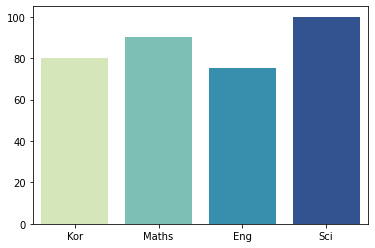

In [5]:
labels = ['Kor', 'Maths', 'Eng', 'Sci']
scores = [80, 90, 75, 100]

#palette : 색상지정
sns.barplot(x = labels, y = scores, palette = 'YlGnBu')

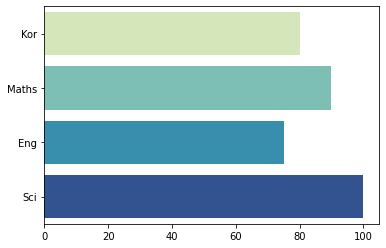

In [6]:
#가로형 막대그래프
sns.barplot(x = scores, y = labels, palette = 'YlGnBu')

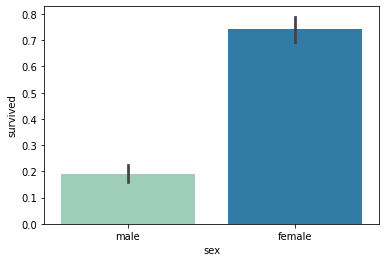

In [7]:
#titanic 데이터
#성별에 따른 생존율
#Survived 평균값의 CI(Confidence Interval)
#hue : 추가 구분 범주
sns.barplot(x = 'sex', y = 'survived', hue = None, data = titanic, palette = 'YlGnBu')

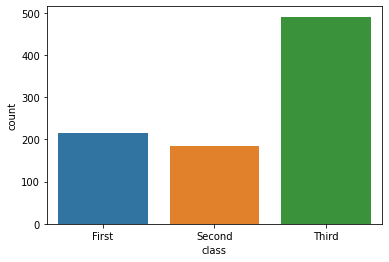

In [8]:
sns.countplot(x = 'class', data = titanic)

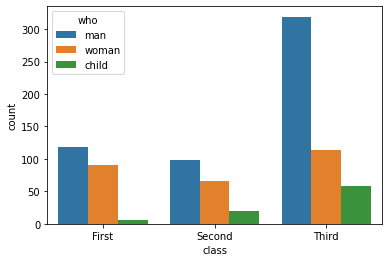

In [9]:
sns.countplot(x = 'class', data = titanic, hue = 'who')

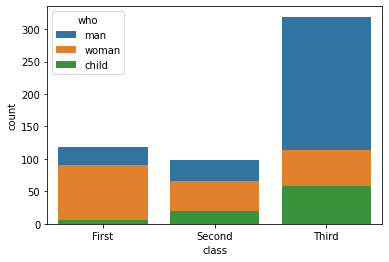

In [10]:
#dodge = False인 경우 hue에 지정된 변수으 종류 별로 그래프 분리해서 하나의 막대에 쌓아서 출력
sns.countplot(x = 'class', data = titanic, hue = 'who', dodge = False)

**박스플롯**

In [12]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


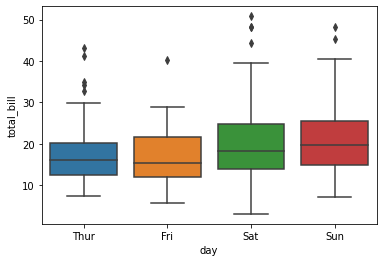

In [13]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

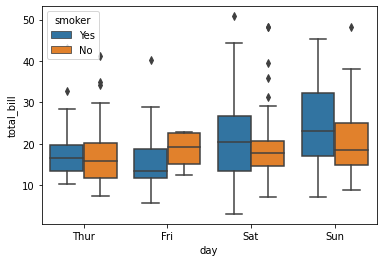

In [14]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')

**바이올린플롯**

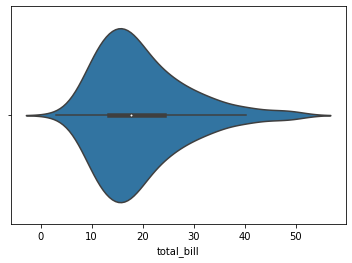

In [15]:
tips = sns.load_dataset('tips')
sns.violinplot(x = tips['total_bill'])

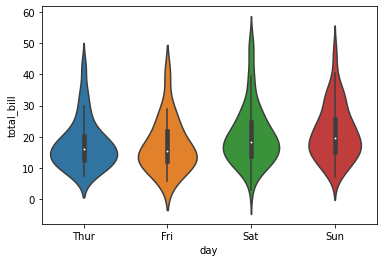

In [16]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill')

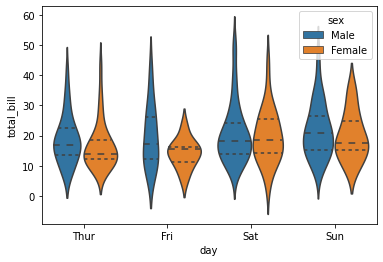

In [17]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', inner = 'quartile')

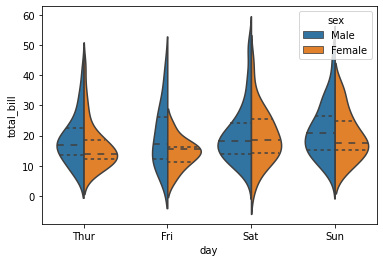

In [18]:
#split = True : hue의 unique가 2개라면, 각 변수 값 별로 나눠 시각화 가능
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', split = True, inner = 'quartile')

**pairplot**
- 다차원 실수형 데이터(3차원 이상의 데이터)
- Grid 형태로 각 데이터 열의 조합에 대해 산점도 생성
- 같은 데이터가 만나는 영역엔 히스토그램 생성

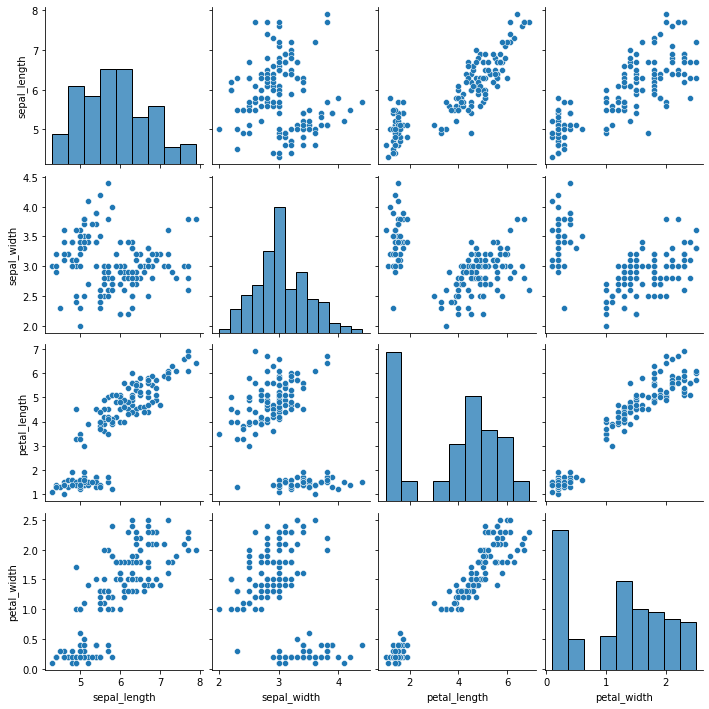

In [19]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)

**히트맵**
- 범주형 변수 & 범주형 변수 (2차원 비교)
- 한준에 알아보려 할 때 사용
- 색상에 따른 차이 직관적으로 보기

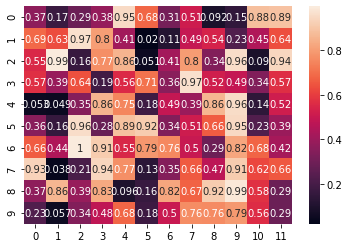

In [20]:
import numpy as np

uniform_data = np.random.rand(10,12)
#annot = True : 데이터값 표시 유무
sns.heatmap(uniform_data, annot = True)

In [24]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [28]:
flights_pivot = flights.pivot('month', 'year', 'passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


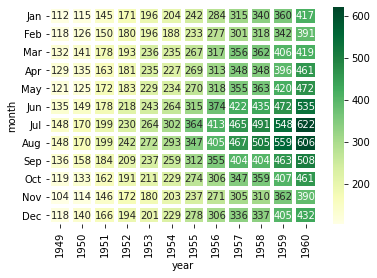

In [29]:
#cmap : 원하는 색상 선택
#linewidth : 박스 사이의 간격
#fmt : 'd'면 정수형태로 셀 안에 출력해줌, default는 전 히트맵 코딩 결과 보기
sns.heatmap(flights_pivot, cmap='YlGn', annot=True, fmt='d', linewidths=3)

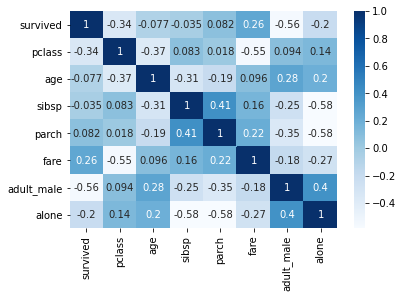

In [30]:
titanic = sns.load_dataset('titanic')
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr, cmap = 'Blues', annot = True)